# Motive Correlations
Here we look to find correlation among the different murder motives.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data


In [3]:
# Motives data
excel_file = pd.read_excel("../Data/murder(2016-2021)/motives _regenerated/Motive(2016-2021)ref.xlsx",sheet_name=None)
excel_file.keys()

dict_keys(['Motive(2016)ref', 'Motive(2017)', 'Motive(2018)', 'Motive(2019)', 'Motive(2020)', 'Motive(2021)'])

In [4]:
# Literacy data
lit_df = pd.read_csv("../Data/Socio-economic data/literacy.csv")
# Alcohol consumption
alc_df = pd.read_csv("../Data/Socio-economic data/alcohol%.csv")
# Net State domestic product
state_dp = pd.read_excel("../Data/Socio-economic data/Net State domestic product.XLSX")
# Population Projection and Sex Ratio
pop_df = pd.read_csv("../Data/Socio-economic data/Pop_sexRatio.csv")
# Poverty Data
pov_df = pd.read_csv("../Data/Socio-economic data/poverty.csv")
# Unemployment Data
unemp_df = pd.read_excel('../Data/Socio-economic data/unemployment (2017-2021).xls')
# Urban population projection
urban_df = pd.read_csv("../Data/Socio-economic data/urban_pop.csv")

## Data Cleaning and Preprocessing

In [5]:
sheets = list(excel_file.keys())
motive_2016 = excel_file[sheets[0]]
motive_2017 = excel_file[sheets[1]]
motive_2018 = excel_file[sheets[2]]
motive_2019 = excel_file[sheets[3]]
motive_2020 = excel_file[sheets[4]]
motive_2021 = excel_file[sheets[5]]

In [6]:
lit_df.drop(columns=['2011 - Rural - Person','2011 - Urban - Persons'],inplace=True)

In [7]:
fill_value = alc_df[~ alc_df['Women alcohol %'].isna()]['Women alcohol %'].mean()
fill_val =  alc_df[~ alc_df['Men alcohol %'].isna()]['Men alcohol %'].mean()
alc_df['Women alcohol %'].fillna(fill_value,inplace=True)
alc_df['Men alcohol %'].fillna(fill_val,inplace=True)

In [8]:
pop_df = pop_df[['State/UT','Total 2016','Sex Ratio 2016','Total 2017','Sex Ratio 2017'
        ,'Total 2018','Sex Ratio 2018','Total 2019','Sex Ratio 2019'
        ,'Total 2020','Sex Ratio 2020','Total 2021','Sex Ratio 2021','Area']]

In [9]:
pov_df.drop(columns=['Year'],inplace=True)

In [10]:
unemp_df.fillna(0,inplace=True)
prev_data = (unemp_df[2017]*5 + unemp_df[2018]*4 
             + unemp_df[2019] * 3 + unemp_df[2020] * 2 + unemp_df[2021])/15
unemp_df[2016] = prev_data.apply(lambda x: round(x,1))

In [11]:
def to_camel(s):
    l = s.lower().split(' ')
    l[0:] = [x.capitalize() for x in l[0:]]
    return ' '.join(l)
to_camel('ALBUS & HAVERSTEIN')

'Albus & Haverstein'

In [12]:
urban_df['State/UT']= urban_df['State/UT'].apply(to_camel)

In [13]:
replaced_states = {
    'Jammu and Kashmir' : 'Jammu & Kashmir',
    'A. and N. Islands' : 'Andaman & Nicobar Islands',
    'D. and N. Haveli' : 'Dadra & Nagar Haveli',
    'Daman and Diu': 'Daman & Diu',
    'Nct Of Delhi' : 'Delhi',
    'Jammu & Kashmir (ut)' : 'Jammu & Kashmir',
    'Uttaranchal' : 'Uttarakhand',
    'Chhatisgarh' : 'Chattisgarh',
    'Chhattisgarh' : 'Chattisgarh',
    'Andaman and Nicobar Islands' : 'Andaman & Nicobar Islands',
    'Andaman and Nicobar Island' : 'Andaman & Nicobar Islands',
    'Dadra and Nagar Haveli' : 'Dadra & Nagar Haveli',
    'D&N Haveli' : 'Dadra & Nagar Haveli',
    'A & N Islands' : 'Andaman & Nicobar Islands',
    'A&N Islands' : 'Andaman & Nicobar Islands',
    'D & N Haveli' : 'Dadra & Nagar Haveli',
    'D & N Haveli and Daman & Diu' : 'Dadra & Nagar Haveli',
    'Dadra and Nagar Haveli and Daman and Diu' : 'Dadra & Nagar Haveli'
}

In [14]:
lit_df['State/UT'].replace(replaced_states,inplace=True)
lit_df['State/UT'] = lit_df['State/UT'].apply(lambda x: x.strip())
alc_df['State/UT'].replace(replaced_states,inplace=True)
alc_df['State/UT'] = alc_df['State/UT'].apply(lambda x: x.strip())
pov_df['State/UT'].replace(replaced_states,inplace=True)
pov_df['State/UT'] = pov_df['State/UT'].apply(lambda x: x.strip())
socio_one = alc_df.merge(lit_df,on='State/UT',how='outer').fillna(80).merge(pov_df,on='State/UT',how='outer')

In [15]:
state_dp['State/UT'] = state_dp['State/UT'].apply(lambda x: x.strip())
state_dp['State/UT'].replace(replaced_states,inplace=True)
state_dp_2016 = state_dp[['State/UT',2016]]
state_dp_2016.rename(columns={2016:'Net State Domestic Product'},inplace=True)
state_dp_2017 = state_dp[['State/UT',2017]]
state_dp_2017.rename(columns={2017:'Net State Domestic Product'},inplace=True)
state_dp_2018 = state_dp[['State/UT',2018]]
state_dp_2018.rename(columns={2018:'Net State Domestic Product'},inplace=True)
state_dp_2019 = state_dp[['State/UT',2019]]
state_dp_2019.rename(columns={2019:'Net State Domestic Product'},inplace=True)
state_dp_2020 = state_dp[['State/UT',2020]]
state_dp_2020.rename(columns={2020:'Net State Domestic Product'},inplace=True)
state_dp_2021 = state_dp[['State/UT',2021]]
state_dp_2021.rename(columns={2021:'Net State Domestic Product'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\3546086366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_dp_2016.rename(columns={2016:'Net State Domestic Product'},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\3546086366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_dp_2017.rename(columns={2017:'Net State Domestic Product'},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\3546086366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [16]:
state_dataset = [state_dp_2016,state_dp_2017,state_dp_2018,state_dp_2019,state_dp_2020,state_dp_2021]

In [17]:
pop_df['State/UT'] = pop_df['State/UT'].apply(lambda x: x.strip())
pop_df['State/UT'].replace(replaced_states,inplace=True)
pop_df_2016 = pop_df[['State/UT', 'Total 2016', 'Sex Ratio 2016','Area']].rename(columns={'Total 2016' : 'Population',
                                                                                   'Sex Ratio 2016': 'Sex Ratio'})
pop_df_2017 = pop_df[['State/UT', 'Total 2017', 'Sex Ratio 2017','Area']].rename(columns={'Total 2017' : 'Population',
                                                                                   'Sex Ratio 2017': 'Sex Ratio'})
pop_df_2018 = pop_df[['State/UT', 'Total 2018', 'Sex Ratio 2018','Area']].rename(columns={'Total 2018' : 'Population',
                                                                                   'Sex Ratio 2018': 'Sex Ratio'})
pop_df_2019 = pop_df[['State/UT', 'Total 2019', 'Sex Ratio 2019','Area']].rename(columns={'Total 2019' : 'Population',
                                                                                   'Sex Ratio 2019': 'Sex Ratio'})
pop_df_2020 = pop_df[['State/UT', 'Total 2020', 'Sex Ratio 2020','Area']].rename(columns={'Total 2020' : 'Population',
                                                                                   'Sex Ratio 2020': 'Sex Ratio'})
pop_df_2021 = pop_df[['State/UT', 'Total 2021', 'Sex Ratio 2021','Area']].rename(columns={'Total 2021' : 'Population',
                                                                                   'Sex Ratio 2021': 'Sex Ratio'})
pop_dataset = [pop_df_2016,pop_df_2017,pop_df_2018,pop_df_2019,pop_df_2020,pop_df_2021]

In [18]:
unemp_df['State/UT'] = unemp_df['State/UT'].apply(lambda x: x.strip())
unemp_df['State/UT'].replace(replaced_states,inplace=True)

unemp_dataset = []
for i in range(6):
    t = 2016 + i 
    lt = ['State/UT',t]
    data = unemp_df[lt].rename(columns={t :'Unemployment'})
    unemp_dataset.append(data)

In [19]:
urban_df['State/UT'] = urban_df['State/UT'].apply(lambda x: x.strip())
urban_df['State/UT'].replace(replaced_states,inplace=True)

urban_dataset = []
for i in range(6):
    t = 2016 + i
    lt = ['State/UT',str(t)]
    data = urban_df[lt].rename(columns={str(t) : 'Urban population'})
    urban_dataset.append(data)

In [20]:
motive_2021.columns

Index(['Sl. No. Col. (1)', 'State/UT Col. (2)', 'Gain - Col. (3)',
       'Personal Vendetta or Enmity - Col. (4)', 'Dowry - Col. (5)',
       'Witchcraft - Col. (6)', 'Child/ Human Sacrifice - Col. (7)',
       'Communal/ Religious - Col. (8)', 'Casteism - Col. (9)',
       'Class Conflict - Col. (10)', 'For Political Reason - Col. (11)',
       'Honour Killing - Col. (12)', 'Love Affairs - Col. (13)',
       'Illicit Relationship - Col. (14)', 'Extremism/ Insurgency - Col. (15)',
       'During Dacoity/ Robbery - Col. (16)', 'Gang Rivalry - Col. (17)',
       'Psychopath/Serial Killers - Col. (18)',
       'Sale of Body Parts - Col. (19)',
       'Disputes - Property/ Land Dispute - Col. (21)',
       'Disputes - Family Dispute - Col. (22)',
       'Disputes - Petty Quarrel/ Dispute - Col. (23)',
       'Disputes - Money Dispute - Col. (24)',
       'Disputes - Water Dispute - Col. (25)',
       'Disputes - Due to Accidents on Roads - Col. (26)',
       'Blind Murder/No Clue/Motive N

In [21]:
data_2016 = motive_2016[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2017 = motive_2017[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2018 = motive_2018[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2019 = motive_2019[['State/UT','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2020 = motive_2020[['State/UT (Col. 2)','Region Pop(in_bill)','Greed_adg','Loath_adg','Love_adg','Year']]
data_2021 = motive_2021[['State/UT Col. (2)','Region Pop(in_bill)','Greed_Reg','Loath_Reg','Love_adj','Year']]

In [22]:
renaming_cols = {'State/UT (Col. 2)' : 'State/UT',
                 'State/UT Col. (2)' : 'State/UT',
                 'Greed_Reg' : 'Greed_adg',
                 'Love_adj':'Love_adg',
                 'Loath_Reg':'Loath_adg'}

In [23]:
data_2016.rename(columns=renaming_cols,inplace=True)
data_2017.rename(columns=renaming_cols,inplace=True)
data_2018.rename(columns=renaming_cols,inplace=True)
data_2019.rename(columns=renaming_cols,inplace=True)
data_2020.rename(columns=renaming_cols,inplace=True)
data_2021.rename(columns=renaming_cols,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\1603358494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016.rename(columns=renaming_cols,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\1603358494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017.rename(columns=renaming_cols,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\1603358494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [24]:
south = ['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Karnataka', 'Kerala', 
         'Lakshadweep', 'Puducherry', 'Tamil Nadu', 'Telangana']
north = ['Haryana','Himachal Pradesh','Punjab','Rajasthan','Chandigarh','Delhi','Jammu & Kashmir','Ladakh']
east = ['Bihar','Jharkhand','Odisha','West Bengal']
west = ['Goa','Gujarat','Maharashtra','Dadra & Nagar Haveli','Daman & Diu']
northe=['Arunachal Pradesh','Assam','Manipur','Mizoram',
        'Nagaland','Sikkim','Tripura','Meghalaya']
central = ['Chattisgarh','Madhya Pradesh','Uttar Pradesh','Uttarakhand']

In [25]:
def codeStates(state):
    if state in south:
        return 'S'
    elif state in north:
        return 'N'
    elif state in east:
        return 'E'
    elif state in west:
        return 'W'
    elif state in northe:
        return 'NE'
    elif state in central:
        return 'C'
   

In [26]:
# data_2016['Region'] = data_2016['State/UT'].apply(codeStates) 
# data_2017['Region'] = data_2017['State/UT'].apply(codeStates) 
# data_2018['Region'] = data_2018['State/UT'].apply(codeStates) 
# data_2019['Region'] = data_2019['State/UT'].apply(codeStates) 
# data_2020['Region'] = data_2020['State/UT'].apply(codeStates) 
# data_2021['Region'] = data_2021['State/UT'].apply(codeStates) 
dataset_raw = [data_2016,data_2017,data_2018,data_2019,data_2020,data_2021]

In [27]:
dataset_raw[0]

,State/UT,Region Pop(in_bill),Greed_adg,Loath_adg,Love_adg,Year
0,Andhra Pradesh,1.768,120.475113,50.339367,87.104072,2016
1,Arunachal Pradesh,0.310,3.225806,9.677419,22.580645,2016
2,Assam,0.310,1796.774194,996.774194,225.806452,2016
3,Bihar,1.596,1008.771930,335.839599,244.360902,2016
4,Chhattisgarh,2.154,55.710306,63.602600,61.745590,2016
5,Goa,1.209,5.789909,9.098428,4.962779,2016
6,Gujarat,1.209,167.907361,209.263854,167.080232,2016
7,Haryana,1.024,207.031250,251.953125,67.382812,2016
8,Himachal Pradesh,1.024,10.742188,12.695312,12.695312,2016
9,Jammu & Kashmir,1.596,7.518797,26.315789,3.759398,2016


In [28]:
def factor(df):
    df['State/UT'] = df['State/UT'].apply(lambda x: x.strip())
    df['State/UT'].replace(replaced_states,inplace=True)
    df['Region'] = df['State/UT'].apply(codeStates)
    return df
dataset = [factor(item) for item in dataset_raw]

C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\431045421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State/UT'] = df['State/UT'].apply(lambda x: x.strip())
C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\431045421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State/UT'].replace(replaced_states,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\431045421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [29]:
# urban_dataset , unemp_dataset, pop_dataset, state_dataset, socio_one
# socio_one.merge(urban_dataset[0],on='State/UT',
#                 how='left').merge(unemp_dataset[0],on='State/UT',how='left').merge(
#     pop_dataset[0],on='State/UT',how='left').merge(state_dataset[0],on='State/UT',how='left').merge(
# dataset[0],on='State/UT',how='left')

In [30]:
data_merger = []
col = 'State/UT'
way = 'left'
for i in range(6):
    merger = socio_one.merge(urban_dataset[i],on=col,
                 how=way).merge(unemp_dataset[i],on=col,how=way).merge(
     pop_dataset[i],on=col,how=way).merge(state_dataset[i],on=col,how=way).merge(
    dataset[i],on=col,how=way)
    data_merger.append(merger)

In [31]:
comp_data = pd.concat(data_merger,ignore_index=True)
comp_data.isna().sum()

Sl.No.                                           0
State/UT                                         0
Women alcohol %                                  0
Men alcohol %                                    0
Literacy %                                       0
Below Poverty Line (BPL) of rural population     0
Below Poverty Line (BPL) of urban population     0
Rural homeless population                        0
Urban homeless population                        0
Urban population                                 0
Unemployment                                     0
Population                                       0
Sex Ratio                                        0
Area                                             0
Net State Domestic Product                      18
Region Pop(in_bill)                              2
Greed_adg                                        2
Loath_adg                                        2
Love_adg                                         2
Year                           

In [32]:
motive_total = pd.concat([data_2016,data_2017,data_2018,data_2019,data_2020,data_2021],ignore_index=True)
motive_total.sample(10)

,State/UT,Region Pop(in_bill),Greed_adg,Loath_adg,Love_adg,Year,Region
73,Arunachal Pradesh,0.310,0.000000,19.354839,19.354839,2018,NE
154,Karnataka,1.768,138.009050,433.257919,102.941176,2020,S
128,Punjab,1.024,291.015625,204.101562,90.820312,2019,N
62,Uttar Pradesh,2.154,346.796657,1017.177344,238.625812,2017,C
72,Andhra Pradesh,1.768,102.375566,211.538462,25.452489,2018,S
130,Sikkim,1.768,4.524887,1.696833,2.828054,2019,NE
47,Karnataka,1.768,187.217195,329.751131,97.285068,2017,S
11,Karnataka,1.768,143.099548,156.108597,80.882353,2016,S
24,Telangana,0.310,735.483871,538.709677,390.322581,2016,S
140,Daman & Diu,1.024,3.906250,0.976562,0.000000,2019,W


In [33]:
motive_total.rename(columns={'Greed_adg':'Greed','Loath_adg':'Loath','Love_adg':'Love'},inplace=True
                )
motive_total.sample(7)

,State/UT,Region Pop(in_bill),Greed,Loath,Love,Year,Region
139,Dadra & Nagar Haveli,1.024,2.929688,2.929688,0.000000,2019,W
92,Punjab,1.024,86.914062,272.460938,108.398438,2018,N
79,Haryana,1.024,271.484375,423.828125,107.421875,2018,N
96,Telangana,0.310,567.741935,941.935484,290.322581,2018,S
41,Goa,1.209,3.308519,14.061208,0.827130,2017,W
202,Tamil Nadu,1.768,107.466063,575.791855,138.009050,2021,S
116,Himachal Pradesh,1.024,39.062500,21.484375,4.882812,2019,N


## Data Visualization

<Axes: >

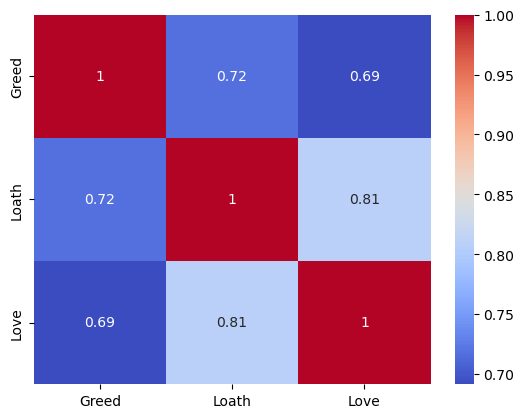

In [34]:
sns.heatmap(motive_total[['Greed','Loath','Love']].corr(),cmap='coolwarm',annot=True)

In [35]:
def extractCorrelations(col):
    
    ele = list(motive_total[col].unique())
    ele_corr = []

    for i in range(0,len(ele)):
        corr = motive_total[motive_total[col] == ele[i]][['Greed','Loath','Love']].corr()
        ele_corr.append(corr)
    greed_loath = []
    greed_love = []
    loath_love = []
    for i in range(0,len(ele)):
        greed_loath.append(ele_corr[i].iat[0,1])
        greed_love.append(ele_corr[i].iat[0,2])
        loath_love.append(ele_corr[i].iat[1,2])
    
    return (greed_loath, greed_love,loath_love)

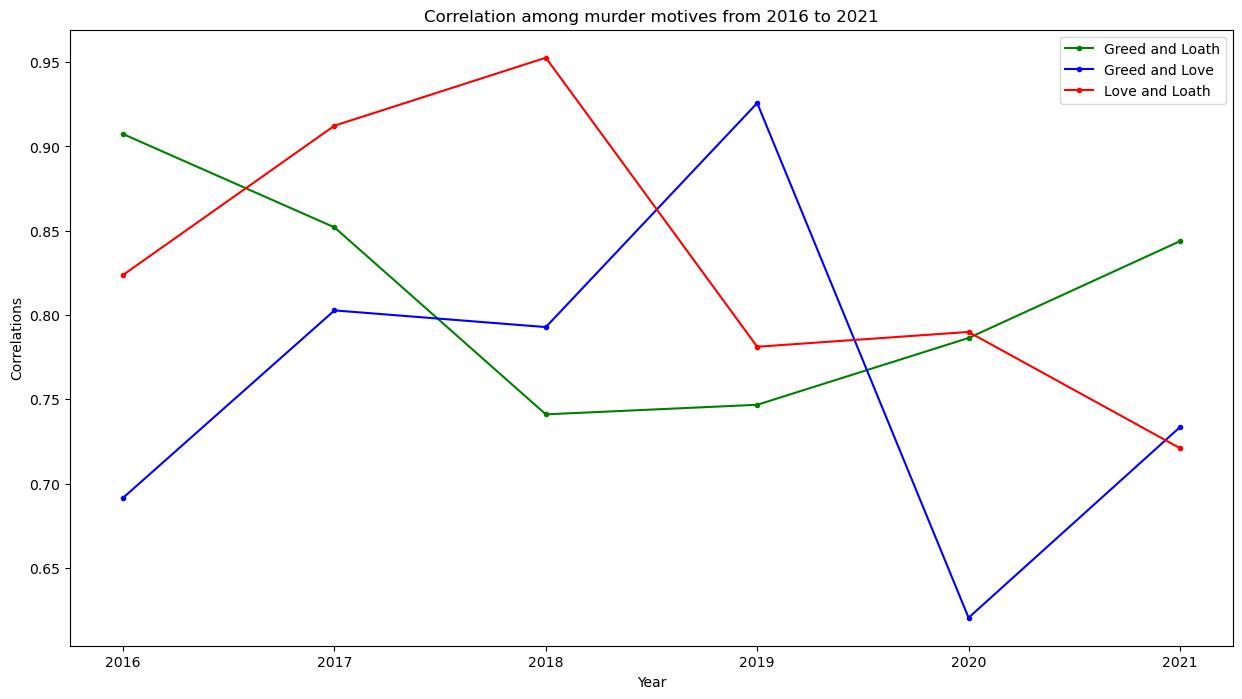

In [37]:
(greed_loath, greed_love,loath_love) = extractCorrelations('Year')
title = "Correlation among murder motives from 2016 to 2021"
plotCorrelation(greed_loath,greed_love,loath_love,title,'Year')

In [38]:
def plotCorrelation(greed_loath, greed_love,loath_love,title,col):
    fig = plt.figure(figsize=(15,8))
    ele = motive_total[col].unique()
    # plt.subplot(1,3,1)
    plt.plot(ele, greed_loath, 'g.-',label='Greed and Loath')
    # plt.ylabel('Correlation between Greed and Loath')
    # plt.subplot(1,3,2)
    plt.plot(ele,greed_love, 'b.-',label='Greed and Love')
    # plt.ylabel('Correlation between Greed and Love')
    # plt.subplot(1,3,3)
    plt.plot(ele,loath_love, 'r.-',label='Love and Loath')
    # plt.ylabel('Correlation between Love and Loath')
    plt.ylabel('Correlations')
    plt.xlabel(col)
    plt.legend()
    plt.title(title)

Text(0.5, 1.0, 'Region Wise Correlations')

<Figure size 1600x1200 with 0 Axes>

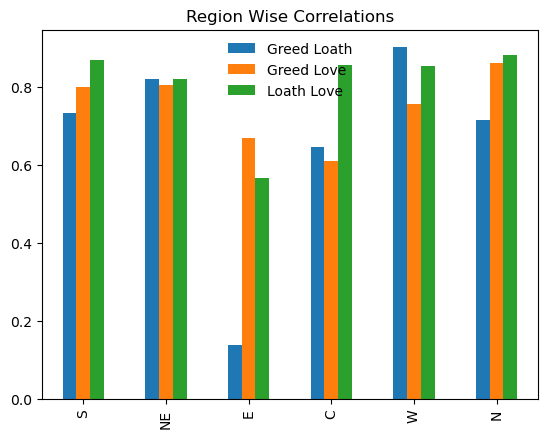

In [39]:
(greed_loath, greed_love,loath_love) = extractCorrelations('Region')
title = "Correlation among murder motives from 2016 to 2021"
df = pd.DataFrame({
    "Greed Loath" : greed_loath,
    "Greed Love" : greed_love,
    "Loath Love": loath_love
},index = motive_total['Region'].unique())
plt.figure(figsize = (16,12))
df.plot(kind='bar')
plt.legend(framealpha=0)
plt.title("Region Wise Correlations")

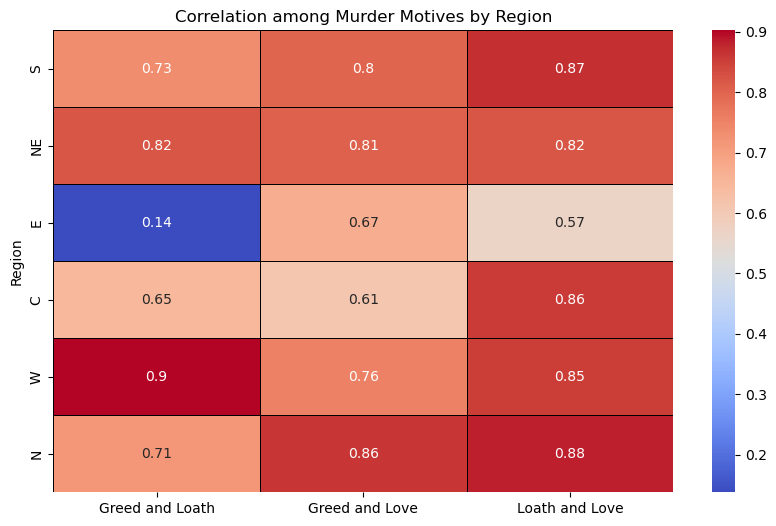

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data, replace with your actual correlation data
data = {
    'Region': ['S', 'NE', 'E', 'C', 'W', 'N'],
    'Greed and Loath': greed_loath,
    'Greed and Love': greed_love,
    'Loath and Love': loath_love
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the Region column as the index
df.set_index('Region', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation among Murder Motives by Region')
plt.show()

## Spatial Analysis

In [41]:
# Looking at the data
motive_total.sample(10)

,State/UT,Region Pop(in_bill),Greed,Loath,Love,Year,Region
71,Puducherry,1.768,6.221719,6.221719,1.131222,2017,S
68,Daman & Diu,1.024,0.000000,0.976562,2.929688,2017,W
53,Mizoram,0.310,0.000000,25.806452,12.903226,2017,NE
88,Meghalaya,0.310,35.483871,70.967742,158.064516,2018,NE
181,Arunachal Pradesh,0.310,0.000000,45.161290,3.225806,2021,NE
154,Karnataka,1.768,138.009050,433.257919,102.941176,2020,S
55,Odisha,1.024,522.460938,110.351562,56.640625,2017,E
51,Manipur,0.310,0.000000,77.419355,16.129032,2017,NE
66,Chandigarh,1.209,1.654260,9.925558,2.481390,2017,N
152,Himachal Pradesh,1.024,19.531250,47.851562,12.695312,2020,N


In [42]:
# imports
import geopandas as gpd

In [43]:
shp_gdf = gpd.read_file('../Data/spatial-files/India States/Indian_states.shp')
shp_gdf.rename(columns={'st_nm':'State/UT'},inplace=True)
shp_gdf

PROJ: proj_create_from_database: Cannot find proj.db


,State/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [44]:
df = motive_total

In [45]:
merged = pd.merge(df,shp_gdf,how='left',on='State/UT')
changed_states = list(merged[merged['geometry'].isna()]['State/UT'].unique())
changed_states

['Arunachal Pradesh',
 'Chattisgarh',
 'Andaman & Nicobar Islands',
 'Dadra & Nagar Haveli',
 'Delhi',
 'Ladakh']

In [46]:
df['State/UT'].replace({
    'Arunachal Pradesh' : 'Arunanchal Pradesh',
    'A & N Islands': 'Andaman & Nicobar Island',
    'A&N Islands': 'Andaman & Nicobar Island',
    'Andaman and Nicobar Islands': 'Andaman & Nicobar Island',
    'D&N Haveli': 'Dadara & Nagar Havelli',
    'D & N Haveli': 'Dadara & Nagar Havelli',
    'D & N Haveli and Daman & Diu': 'Dadara & Nagar Havelli',
    'Dadra and Nagar Haveli and Daman and Diu': 'Dadara & Nagar Havelli',
    'Delhi': 'NCT of Delhi',
    'Jammu and Kashmir': 'Jammu & Kashmir',
    'Chattisgarh' : 'Chhattisgarh'
},inplace=True)

In [47]:
merged = pd.merge(df,shp_gdf,how='left',on='State/UT')
merged

,State/UT,Region Pop(in_bill),Greed,Loath,Love,Year,Region,geometry
0,Andhra Pradesh,1.768,120.475113,50.339367,87.104072,2016,S,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
1,Arunanchal Pradesh,0.310,3.225806,9.677419,22.580645,2016,NE,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,0.310,1796.774194,996.774194,225.806452,2016,NE,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,1.596,1008.771930,335.839599,244.360902,2016,E,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chhattisgarh,2.154,55.710306,63.602600,61.745590,2016,C,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
...,...,...,...,...,...,...,...,...
211,NCT of Delhi,1.024,89.843750,192.382812,34.179688,2021,N,"POLYGON ((77.09361 28.86940, 77.10973 28.86722..."
212,Jammu & Kashmir,1.024,16.601562,64.453125,13.671875,2021,N,"POLYGON ((74.73451 37.02068, 74.73647 37.01937..."
213,Ladakh,1.024,0.000000,0.000000,0.000000,2021,N,None
214,Lakshadweep,1.768,0.000000,0.000000,0.000000,2021,S,"MULTIPOLYGON (((74.10131 11.20431, 74.09908 11..."


In [48]:
a = gpd.GeoDataFrame(merged.geometry)
merged['lon'] = a['geometry'].centroid.x
merged['lat'] = a['geometry'].centroid.y
merged.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\4082699179.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['lon'] = a['geometry'].centroid.x
C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\4082699179.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['lat'] = a['geometry'].centroid.y


In [49]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [50]:
features = ['lat', 'lon', 'Greed', 'Loath', 'Love']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(merged[merged['Year']==2021][features])

In [51]:
import warnings
warnings.filterwarnings("ignore")

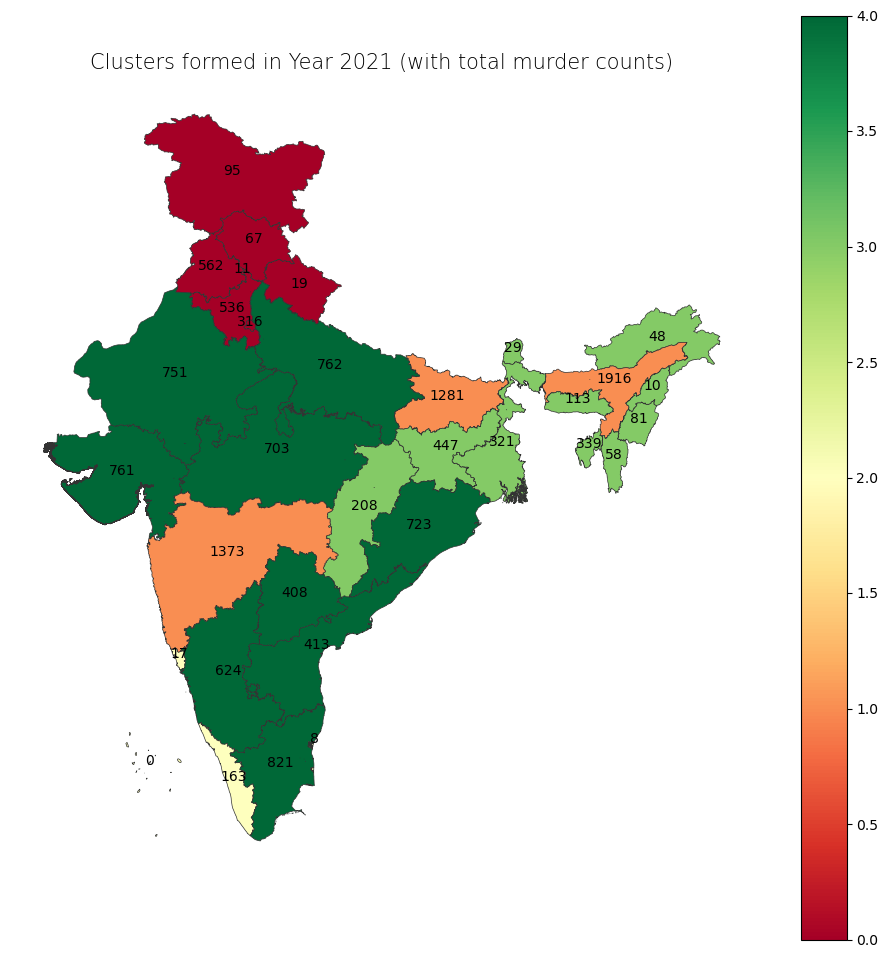

In [52]:
# K-Means CLustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
df2 = merged[merged['Year'] == 2021]
df2['kmeans_labels'] = kmeans.fit_predict(df_scaled)
df2 = gpd.GeoDataFrame(df2)
# Visualize the K-means clustering
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clusters formed in Year 2021 (with total murder counts)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
ax = df2.plot(column='kmeans_labels',cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
df2['total'] = df2['Love'] + df2['Loath'] + df2['Greed']
for x, y, label in zip(df2.geometry.centroid.x, df2.geometry.centroid.y,df2['total']):
    ax.annotate('%0.0f'%label, xy=(x, y), horizontalalignment='center')

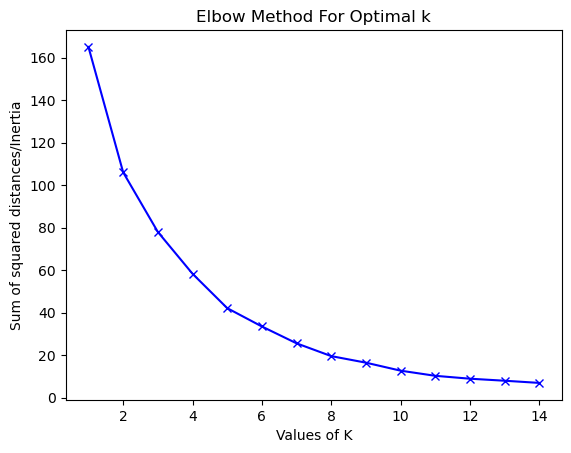

In [53]:
df2 = merged[merged['Year'] == 2021]
df_scaled = scaler.fit_transform(df2[features])
# To pick the optimal cluster number
Sum_of_squared_distances = []
K = range(1,15)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

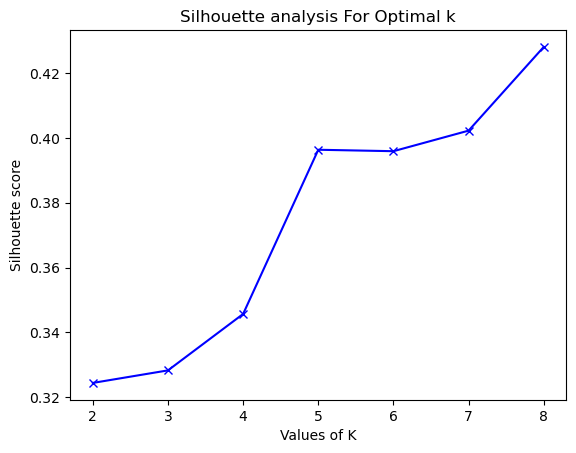

In [54]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

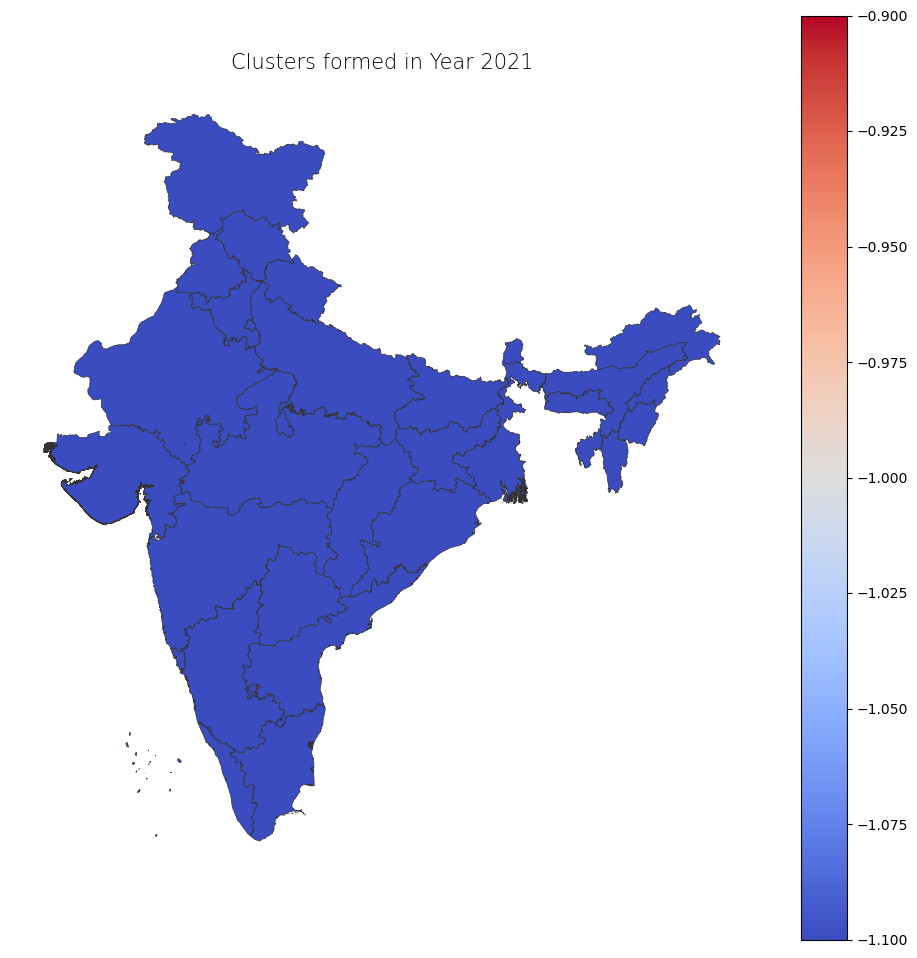

In [55]:
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust epsilon and min_samples as needed
df2['dbscan_labels'] = dbscan.fit_predict(df2[['lat', 'lon','Greed','Loath','Love']])

# Visualize the DBSCAN clustering
df2 = gpd.GeoDataFrame(df2)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clusters formed in Year 2021',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = df2.plot(column='dbscan_labels',cmap='coolwarm', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

## Socio-economic factors

In [58]:
comp_data.to_csv('Complete_data.csv')

### Feature Engineering

In [78]:
data=comp_data
data.dropna(inplace=True)

In [79]:
data['Urbanization'] = comp_data['Urban population'] / comp_data['Population']
data['NSDP per capita'] = comp_data['Net State Domestic Product'] / comp_data['Population']
data['Population Density'] = comp_data['Population']/comp_data['Area']
data['Homeless prop'] = (data['Rural homeless population'] + data['Urban homeless population']) / data['Population']
data['cat'] = data['Sex Ratio'].apply(lambda x: x+1000)
data['Alcohol %'] = ((data['Sex Ratio'] * data['Men alcohol %']) + (1000 * data['Women alcohol %'])) / (data['cat'])
data['Below poverty line'] = data['Below Poverty Line (BPL) of rural population'] + data['Below Poverty Line (BPL) of urban population']
data = data.drop(['Urban population','Population','Net State Domestic Product','Area','Region Pop(in_bill)',
                  'Women alcohol %', 'Men alcohol %',
                  'Below Poverty Line (BPL) of rural population','Below Poverty Line (BPL) of urban population',
                 'Rural homeless population','Urban homeless population','cat'],axis=1)
data['Total Murders'] = data['Loath_adg'] + data['Love_adg'] + data['Greed_adg'] 
data.sample(10)

,Sl.No.,State/UT,Literacy %,Unemployment,Sex Ratio,Greed_adg,Loath_adg,Love_adg,Year,Region,Urbanization,NSDP per capita,Population Density,Homeless prop,Alcohol %,Below poverty line,Total Murders
49,14,Rajasthan,70.5,5.0,1065.277778,403.225806,558.064516,241.935484,2017.0,N,0.258396,0.969566,0.221591,2.393871,26.226429,100.882460,1203.225806
181,2,Assam,79.0,3.8,1036.878613,422.580645,1380.645161,112.903226,2021.0,NE,0.153896,1.865202,0.449247,0.366621,48.414274,99.861653,1916.129032
0,1,Andhra Pradesh,70.0,4.7,1001.786755,120.475113,50.339367,87.104072,2016.0,S,0.326723,1.826199,0.316234,1.188334,46.405980,46.603568,257.918552
165,22,Himachal Pradesh,86.5,3.3,1029.168960,19.531250,47.851562,12.695312,2020.0,N,0.102522,18.187008,0.132452,0.555736,22.787903,5.535433,80.078125
26,27,Nagaland,82.5,20.1,1070.088845,8.771930,6.265664,0.000000,2016.0,NE,0.366714,30.643300,0.126485,0.432046,55.626657,3.746171,15.037594
2,3,Bihar,68.5,7.2,1086.736819,1008.771930,335.839599,244.360902,2016.0,E,0.117615,0.220935,1.223570,0.395643,40.752563,351.235180,1588.972431
36,1,Andhra Pradesh,70.0,4.5,1001.544998,130.090498,193.438914,110.294118,2017.0,S,0.332536,1.991065,0.317977,1.181822,46.405172,46.603568,433.823529
145,2,Assam,79.0,4.1,1037.612428,800.000000,1135.483871,100.000000,2020.0,NE,0.152660,1.757166,0.444784,0.370299,48.415530,99.861653,2035.483871
169,26,Mizoram,91.0,3.5,1020.033389,3.225806,35.483871,12.903226,2020.0,NE,0.544628,96.057025,0.057398,0.133058,30.853636,2.225262,51.612903
171,28,Sikkim,84.0,1.1,1116.352201,3.225806,3.225806,12.903226,2020.0,NE,0.441308,352.469539,0.094842,0.411590,38.963893,0.506354,19.354839


['Literacy %',
 'Unemployment',
 'Sex Ratio',
 'Urbanization',
 'NSDP per capita',
 'Population Density',
 'Homeless prop',
 'Alcohol %',
 'Below poverty line']

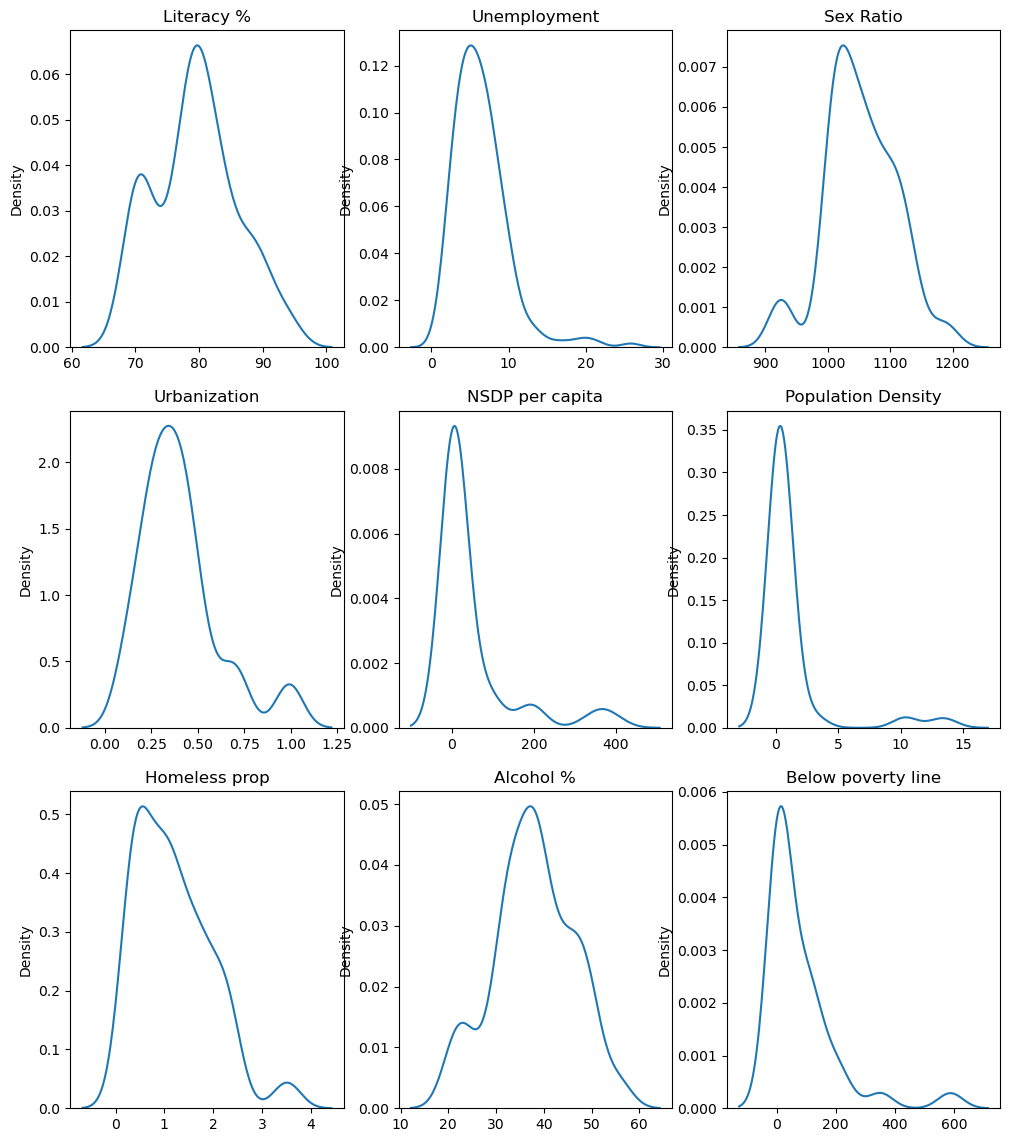

In [107]:
# Distribution of various socio_economic factors(Literacy %,Unemployment,Sex Ratio etc.)

fig, ax = plt.subplots(3,3,figsize=(12,14))
k=0
columns = list(data.drop(['Sl.No.','State/UT','Greed_adg','Loath_adg','Love_adg',
                'Year','Total Murders','Region'],axis=1).columns)

for i in range(3):
    for j in range(3):
        sns.kdeplot(data=data,x=columns[k],ax = ax[i,j]).set(title=columns[k],xlabel=None)
        k += 1

<Axes: >

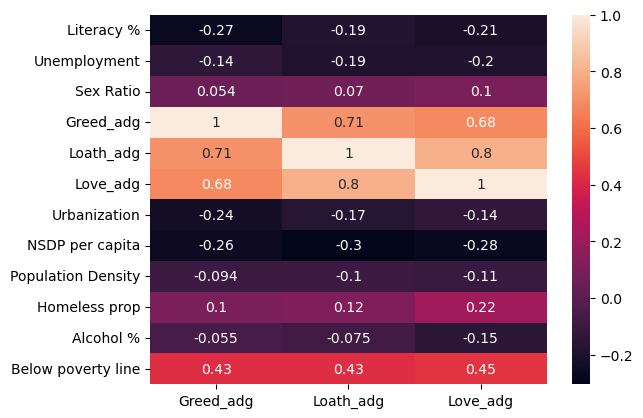

In [68]:

sns.heatmap(data.drop(['Sl.No.','Year'],axis=1).corr()[['Greed_adg','Loath_adg','Love_adg']],annot=True)

In [ ]:
plt.hist()